# Performance Analysis of YouTube Channel: Insights on Views, Engagement, and Revenue

## Table of Contents
1. [Loading the datasets from Kaggle](##loading-the-datasets-from-kaggle)
2. [Understanding the Dataset](##understanding-the-dataset)
3. [Data cleaning and EDA](##data-cleaning-and-eda)
4. [KPI building](##kpi-building)
5. [Core Questions](##core-questions)
6. [Visualizations](##visualizations)
7. [Insights](##insights)

In [ ]:
import pandas as pd
from pathlib import Path
import kagglehub
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the datasets from Kaggle

In [37]:
# Optional: where you want cleaned copies saved
PROJECT_DIR = Path.cwd() / "data" / "raw"
PROJECT_DIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_columns", None)

# To Converts messy column names like "Channel Name (Subs)" → channel_name_subs.
def snake_case_cols(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [
        re.sub(r'\W+', '_', str(c)).strip('_').lower()
        for c in df.columns
    ]
    return df

#For downloading and loadind dataset
def dl_and_load(slug: str) -> tuple[pd.DataFrame, Path]:
    base = Path(kagglehub.dataset_download(slug))
    files = [p for p in base.rglob("*") if p.suffix.lower() in {".csv", ".xlsx", ".parquet"}]
    if not files:
        raise FileNotFoundError(f"No tabular files found under {base}.")
    priority = {".csv": 0, ".xlsx": 1, ".parquet": 2}
    files.sort(key=lambda p: (priority.get(p.suffix.lower(), 9), -p.stat().st_size))
    f = files[0]

    try:
        if f.suffix.lower() == ".csv":
            try:
                df = pd.read_csv(f, low_memory=False, encoding="utf-8")
            except UnicodeDecodeError:
                df = pd.read_csv(f, low_memory=False, encoding="latin1")
        elif f.suffix.lower() == ".xlsx":
            df = pd.read_excel(f)
        else:
            df = pd.read_parquet(f)
    except Exception as e:
        raise RuntimeError(f"Error reading {f.name}: {e}")
    return snake_case_cols(df), f

In [42]:
yt_perf_df, yt_perf_file = dl_and_load("positivealexey/youtube-channel-performance-analytics")
print(f"Loaded YouTube Performance Analytics from: {yt_perf_file}")
display(yt_perf_df.head(3), yt_perf_df.shape)

# Optional: Save raw copy
yt_perf_df.to_csv(PROJECT_DIR / "youtube_performance_raw.csv", index=False)


Loaded YouTube Performance Analytics from: C:\Users\mihir\.cache\kagglehub\datasets\positivealexey\youtube-channel-performance-analytics\versions\2\youtube_channel_real_performance_analytics.csv


,id,video_duration,video_publish_time,days_since_publish,day,month,year,day_of_week,revenue_per_1000_views_usd,monetized_playbacks_estimate,playback_based_cpm_usd,cpm_usd,ad_impressions,estimated_adsense_revenue_usd,doubleclick_revenue_usd,youtube_ads_revenue_usd,watch_page_ads_revenue_usd,youtube_premium_usd,transaction_revenue_usd,transactions,revenue_from_transactions_usd,reactions,chat_messages_count,reminders_set,stream_hours,remix_views,remix_count,subscribers_from_posts,new_comments,shares,like_rate,dislikes,likes,unsubscribes,new_subscribers,returned_items_usd,unconfirmed_commissions_usd,approved_commissions_usd,orders,total_sales_volume_usd,end_screen_click_through_rate,end_screen_impressions,end_screen_clicks,teaser_click_through_rate,teaser_impressions,teaser_clicks,card_click_through_rate,card_impressions,card_clicks,views_per_playlist_start,playlist_views,playlist_watch_time_hours,clip_watch_time_hours,clip_views,youtube_premium_watch_time_hours,youtube_premium_views,returning_viewers,new_viewers,average_views_per_user,unique_viewers,watched_not_skipped,feed_impressions,average_view_percentage,average_view_duration,views,watch_time_hours,subscribers,estimated_revenue_usd,impressions,video_thumbnail_ctr
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07


(364, 70)

## Understanding the Dataset

### YouTube Channel Performance Analytics

In [44]:
yt_perf_df.head()

,id,video_duration,video_publish_time,days_since_publish,day,month,year,day_of_week,revenue_per_1000_views_usd,monetized_playbacks_estimate,playback_based_cpm_usd,cpm_usd,ad_impressions,estimated_adsense_revenue_usd,doubleclick_revenue_usd,youtube_ads_revenue_usd,watch_page_ads_revenue_usd,youtube_premium_usd,transaction_revenue_usd,transactions,revenue_from_transactions_usd,reactions,chat_messages_count,reminders_set,stream_hours,remix_views,remix_count,subscribers_from_posts,new_comments,shares,like_rate,dislikes,likes,unsubscribes,new_subscribers,returned_items_usd,unconfirmed_commissions_usd,approved_commissions_usd,orders,total_sales_volume_usd,end_screen_click_through_rate,end_screen_impressions,end_screen_clicks,teaser_click_through_rate,teaser_impressions,teaser_clicks,card_click_through_rate,card_impressions,card_clicks,views_per_playlist_start,playlist_views,playlist_watch_time_hours,clip_watch_time_hours,clip_views,youtube_premium_watch_time_hours,youtube_premium_views,returning_viewers,new_viewers,average_views_per_user,unique_viewers,watched_not_skipped,feed_impressions,average_view_percentage,average_view_duration,views,watch_time_hours,subscribers,estimated_revenue_usd,impressions,video_thumbnail_ctr
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,1.667,0.857,35.0,0.016,0.000,0.030,0.016,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0,94.02,14.0,220.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6667,20.0,0.0640,0.0000,0.0,0.0711,20.0,0.0,0.0,0.0,0.0,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,7.0,76.98,180.0,602.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6667,10.0,0.0611,0.0000,0.0,0.2519,39.0,0.0,0.0,0.0,0.0,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [47]:
yt_perf_df.shape

((364, 70),
    id  video_duration   video_publish_time  days_since_publish  day  month  \
 0   0           201.0  2016-06-02 00:00:00                   0    2      6   
 
    year day_of_week  revenue_per_1000_views_usd  monetized_playbacks_estimate  \
 0  2016    Thursday                       0.024                         723.0   
 
    playback_based_cpm_usd  cpm_usd  ad_impressions  \
 0                   1.386    1.021           981.0   
 
    estimated_adsense_revenue_usd  doubleclick_revenue_usd  \
 0                          0.527                    0.024   
 
    youtube_ads_revenue_usd  watch_page_ads_revenue_usd  youtube_premium_usd  \
 0                    1.002                       0.551                 0.01   
 
    transaction_revenue_usd  transactions  revenue_from_transactions_usd  \
 0                      0.0           0.0                            0.0   
 
    reactions  chat_messages_count  reminders_set  stream_hours  remix_views  \
 0        0.0               

In [48]:
yt_perf_df.info(), yt_perf_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                364 non-null    int64  
 1   video_duration                    364 non-null    float64
 2   video_publish_time                364 non-null    object 
 3   days_since_publish                364 non-null    int64  
 4   day                               364 non-null    int64  
 5   month                             364 non-null    int64  
 6   year                              364 non-null    int64  
 7   day_of_week                       364 non-null    object 
 8   revenue_per_1000_views_usd        364 non-null    float64
 9   monetized_playbacks_estimate      364 non-null    float64
 10  playback_based_cpm_usd            364 non-null    float64
 11  cpm_usd                           364 non-null    float64
 12  ad_impre

(None,
                 id  video_duration   video_publish_time  days_since_publish  \
 count   364.000000      364.000000                  364          364.000000   
 unique         NaN             NaN                  357                 NaN   
 top            NaN             NaN  2023-12-26 00:00:00                 NaN   
 freq           NaN             NaN                    2                 NaN   
 mean    181.500000      664.239011                  NaN            8.406593   
 std     105.221988      330.646183                  NaN           15.371239   
 min       0.000000        9.000000                  NaN            0.000000   
 25%      90.750000      496.000000                  NaN            3.000000   
 50%     181.500000      613.000000                  NaN            5.000000   
 75%     272.250000      786.500000                  NaN            9.000000   
 max     363.000000     2311.000000                  NaN          260.000000   
 
                day       month

## Data cleaning and EDA

In [49]:
# Making copy to preserve original dataset.
df = yt_perf_df.copy()

# Parse datetime & derive time features
df["video_publish_time"] = pd.to_datetime(df["video_publish_time"], errors="coerce")
df["publish_hour"] = df["video_publish_time"].dt.hour
df["publish_date"] = df["video_publish_time"].dt.date

In [50]:
# Known non-numeric columns
non_numeric = {"video_publish_time", "day_of_week", "publish_date"}

# Force numeric for everything else (safe, given your dtypes dump)
for col in df.columns:
    if col not in non_numeric:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [51]:
# Basic sanity: clip impossible negative values to 0 for count-like columns
count_like = [
    "views","likes","dislikes","comments","shares","impressions",
    "ad_impressions","monetized_playbacks_estimate","end_screen_impressions",
    "end_screen_clicks","teaser_impressions","teaser_clicks",
    "card_impressions","card_clicks","unique_viewers","returning_viewers",
    "new_viewers","orders","transactions","subscribers","new_subscribers",
    "unsubscribes","playlist_views","clip_views","youtube_premium_views"
]
for c in set(count_like).intersection(df.columns):
    df[c] = df[c].clip(lower=0)

In [52]:
# Fill NA with 0 for metrics (keeps math simple)
metric_cols = [c for c in df.columns if c not in non_numeric]
df[metric_cols] = df[metric_cols].fillna(0.0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                364 non-null    int64         
 1   video_duration                    364 non-null    float64       
 2   video_publish_time                364 non-null    datetime64[ns]
 3   days_since_publish                364 non-null    int64         
 4   day                               364 non-null    int64         
 5   month                             364 non-null    int64         
 6   year                              364 non-null    int64         
 7   day_of_week                       364 non-null    object        
 8   revenue_per_1000_views_usd        364 non-null    float64       
 9   monetized_playbacks_estimate      364 non-null    float64       
 10  playback_based_cpm_usd            364 non-null    

## KPI building

In [53]:
# Engagements
# engagements = likes + comments + shares
df["engagements"] = df.get("likes",0) + df.get("new_comments",0) + df.get("shares",0)

# er_per_view = engagements / views
df["er_per_view"] = np.where(df["views"]>0, df["engagements"]/df["views"], np.nan)

In [54]:
# Retention & duration-based
# retention_pct = average_view_percentage / 100
df["retention_pct"] = df["average_view_percentage"] / 100.0
df["avg_view_duration_sec"] = df["average_view_duration"]  # already in seconds per your sample

# avg_views_per_minute = views / (video_duration/60)
df["avg_views_per_minute"] = np.where(df["video_duration"]>0, df["views"]/(df["video_duration"]/60.0), np.nan)

In [55]:
# Monetization
# rpm_calc = estimated_revenue_usd / views * 1000 (check vs revenue_per_1000_views_usd)
df["rpm_calc"] = np.where(df["views"]>0, df["estimated_revenue_usd"]/df["views"]*1000.0, np.nan)

# monetized_playbacks_rate = monetized_playbacks_estimate / views
df["monetized_playbacks_rate"] = np.where(df["views"]>0, df["monetized_playbacks_estimate"]/df["views"], np.nan)

In [56]:
# Thumbnail CTR: dataset is already %; also provide fraction
# ctr_thumbnail (recompute) = video_thumbnail_ctr / 100 if you want a fraction
df["thumbnail_ctr_frac"] = df["video_thumbnail_ctr"] / 100.0

In [57]:
# End screen / teaser / card CTR sanity
for pair, out in [
    (("end_screen_clicks","end_screen_impressions"),"end_screen_ctr_calc"),
    (("teaser_clicks","teaser_impressions"),"teaser_ctr_calc"),
    (("card_clicks","card_impressions"),"card_ctr_calc"),
]:
    clicks, imps = pair
    if clicks in df.columns and imps in df.columns:
        df[out] = np.where(df[imps]>0, df[clicks]/df[imps], np.nan)

In [58]:
# Subs movements
# net_subs = new_subscribers − unsubscribes
df["net_subs"] = df.get("new_subscribers",0) - df.get("unsubscribes",0)

In [59]:
# Revenue breakdown (sum and reconcile to estimated_revenue_usd)
rev_parts = [
    "estimated_adsense_revenue_usd", "doubleclick_revenue_usd",
    "youtube_ads_revenue_usd", "watch_page_ads_revenue_usd",
    "youtube_premium_usd", "transaction_revenue_usd",
    "revenue_from_transactions_usd", "returned_items_usd",
    "approved_commissions_usd", "unconfirmed_commissions_usd",
    "total_sales_volume_usd"  # not revenue but useful for ratios
]
present_parts = [c for c in rev_parts if c in df.columns]
df["revenue_parts_sum"] = df[present_parts].sum(axis=1)
df["revenue_gap_vs_estimated"] = df["estimated_revenue_usd"] - df["revenue_parts_sum"]

df[[
    "views","estimated_revenue_usd","revenue_per_1000_views_usd","rpm_calc",
    "monetized_playbacks_estimate","monetized_playbacks_rate",
    "engagements","er_per_view","retention_pct","thumbnail_ctr_frac","net_subs",
    "revenue_parts_sum","revenue_gap_vs_estimated"
]].head(5)

,views,estimated_revenue_usd,revenue_per_1000_views_usd,rpm_calc,monetized_playbacks_estimate,monetized_playbacks_rate,engagements,er_per_view,retention_pct,thumbnail_ctr_frac,net_subs,revenue_parts_sum,revenue_gap_vs_estimated
0,23531.0,0.561,0.024,0.023841,723.0,0.030725,1027.0,0.043645,0.4038,0.2766,51.0,2.114,-1.553
1,11478.0,0.648,0.056,0.056456,727.0,0.063339,362.0,0.031539,0.3985,0.0585,33.0,2.465,-1.817
2,6153.0,0.089,0.014,0.014464,76.0,0.012352,243.0,0.039493,0.3088,0.0707,8.0,0.337,-0.248
3,4398.0,0.017,0.004,0.003865,18.0,0.004093,239.0,0.054343,1.0305,0.0560,2.0,0.062,-0.045
4,14659.0,0.000,0.000,0.000000,0.0,0.000000,659.0,0.044955,0.5570,0.0862,28.0,0.000,0.000


## Core Questions 

#### Q1. What drives estimated revenue? (RPM, views, monetized playbacks, CTR, retention)

In [60]:
drivers = df[[
    "estimated_revenue_usd","views","rpm_calc","revenue_per_1000_views_usd",
    "monetized_playbacks_rate","ad_impressions","video_thumbnail_ctr",
    "retention_pct","avg_view_duration_sec","average_views_per_user",
    "unique_viewers"
]].corr(numeric_only=True)["estimated_revenue_usd"].sort_values(ascending=False)
drivers


estimated_revenue_usd         1.000000
ad_impressions                0.825534
monetized_playbacks_rate      0.541979
rpm_calc                      0.380992
revenue_per_1000_views_usd    0.376919
views                         0.357901
avg_view_duration_sec         0.207286
video_thumbnail_ctr           0.059658
retention_pct                -0.022337
average_views_per_user             NaN
unique_viewers                     NaN
Name: estimated_revenue_usd, dtype: float64

#### Q2. Does publish timing (weekday/hour) change views, RPM, CTR, or retention?

In [61]:
# Weekday performance
weekday_perf = df.groupby("day_of_week").agg(
    videos=("id","count"),
    views=("views","median"),
    rpm=("rpm_calc","median"),
    retention=("retention_pct","median"),
    thumb_ctr=("thumbnail_ctr_frac","median")
).sort_values("views", ascending=False)

# Hour-of-day performance
hour_perf = df.groupby("publish_hour").agg(
    videos=("id","count"),
    views=("views","median"),
    rpm=("rpm_calc","median"),
    retention=("retention_pct","median"),
    thumb_ctr=("thumbnail_ctr_frac","median")
).sort_values("views", ascending=False)

weekday_perf, hour_perf.head(12)


(             videos     views       rpm  retention  thumb_ctr
 day_of_week                                                  
 Monday           46  132536.0  0.051547    0.45655    0.08905
 Sunday           63  114060.0  0.039768    0.46960    0.09190
 Wednesday        57  110478.0  0.038560    0.45450    0.08700
 Thursday         35   93487.0  0.060294    0.43000    0.08210
 Friday           54   92997.0  0.037531    0.46160    0.07985
 Saturday         49   87281.0  0.055585    0.45480    0.08240
 Tuesday          60   78226.5  0.073243    0.45515    0.07845,
               videos     views       rpm  retention  thumb_ctr
 publish_hour                                                  
 0                364  101950.5  0.050194    0.45465    0.08395)

#### Q3. What video durations retain viewers best? Is there a sweet spot?

In [62]:
bins = [0,60,180,300,600,1200,3600]  # ≤1m, 1–3m, 3–5m, 5–10m, 10–20m, 20–60m
labels = ["≤1m","1–3m","3–5m","5–10m","10–20m","20–60m"]
df["duration_bin"] = pd.cut(df["video_duration"], bins=bins, labels=labels, include_lowest=True)

dur_perf = df.groupby("duration_bin").agg(
    videos=("id","count"),
    views=("views","median"),
    retention=("retention_pct","median"),
    rpm=("rpm_calc","median"),
    ctr=("thumbnail_ctr_frac","median")
).sort_index()
dur_perf


C:\Users\mihir\AppData\Local\Temp\ipykernel_2636\3837403728.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_perf = df.groupby("duration_bin").agg(


,videos,views,retention,rpm,ctr
duration_bin,,,,,
≤1m,12,9118.0,0.92845,0.011375,0.04900
1–3m,8,8166.0,0.43145,0.048224,0.04705
3–5m,7,17524.0,0.39880,0.042177,0.07070
5–10m,148,146891.0,0.48525,0.036885,0.09365
10–20m,167,99797.0,0.43830,0.074962,0.08230
20–60m,22,24172.5,0.32410,0.181113,0.05550


#### Q4. Which videos are top by revenue and RPM?

In [63]:
top_by_revenue = df.nlargest(10, "estimated_revenue_usd")[[
    "id","views","estimated_revenue_usd","rpm_calc","retention_pct","video_thumbnail_ctr","publish_hour","day_of_week"
]]
top_by_rpm = df[df["views"]>1000].nlargest(10, "rpm_calc")[[
    "id","views","estimated_revenue_usd","rpm_calc","retention_pct","video_thumbnail_ctr","publish_hour","day_of_week"
]]
top_by_revenue, top_by_rpm


(      id     views  estimated_revenue_usd  rpm_calc  retention_pct  \
 228  228  670990.0                103.117  0.153679         0.4211   
 257  257  241060.0                 83.979  0.348374         0.3751   
 251  251  343319.0                 80.265  0.233791         0.4768   
 289  289   99196.0                 70.247  0.708164         0.5536   
 278  278  188324.0                 65.978  0.350343         0.5511   
 260  260  302999.0                 62.047  0.204776         0.4109   
 293  293  101025.0                 59.058  0.584588         0.5096   
 294  294   67556.0                 55.040  0.814731         0.5230   
 290  290   89284.0                 50.344  0.563864         0.6093   
 284  284   93487.0                 44.228  0.473093         0.5114   
 
      video_thumbnail_ctr  publish_hour day_of_week  
 228                 4.11             0     Tuesday  
 257                 8.38             0      Monday  
 251                 9.34             0    Thursday  
 

#### Q5. Do end screens, cards, or teasers actually get clicks?

In [64]:
cta_perf = df.agg(
    end_screen_ctr=("end_screen_ctr_calc","median"),
    teaser_ctr=("teaser_ctr_calc","median"),
    card_ctr=("card_ctr_calc","median")
)
cta_perf

,end_screen_ctr_calc,teaser_ctr_calc,card_ctr_calc
end_screen_ctr,0.010714,NaN,NaN
teaser_ctr,NaN,0.008215,NaN
card_ctr,NaN,NaN,0.061388


#### Q6. Are you actually growing subs from videos?

In [65]:
subs_overview = df.agg(
    total_new=("new_subscribers","sum"),
    total_unsubs=("unsubscribes","sum"),
    net_subs=("net_subs","sum")
)
subs_by_weekday = df.groupby("day_of_week")["net_subs"].sum().sort_values(ascending=False)
subs_overview, subs_by_weekday

(              new_subscribers  unsubscribes  net_subs
 total_new            127375.0           NaN       NaN
 total_unsubs              NaN       10522.0       NaN
 net_subs                  NaN           NaN  116853.0,
 day_of_week
 Friday       25265.0
 Sunday       21304.0
 Tuesday      19183.0
 Wednesday    15088.0
 Saturday     14679.0
 Monday       12755.0
 Thursday      8579.0
 Name: net_subs, dtype: float64)

## Visualizations

#### 1. Daily Views Trend

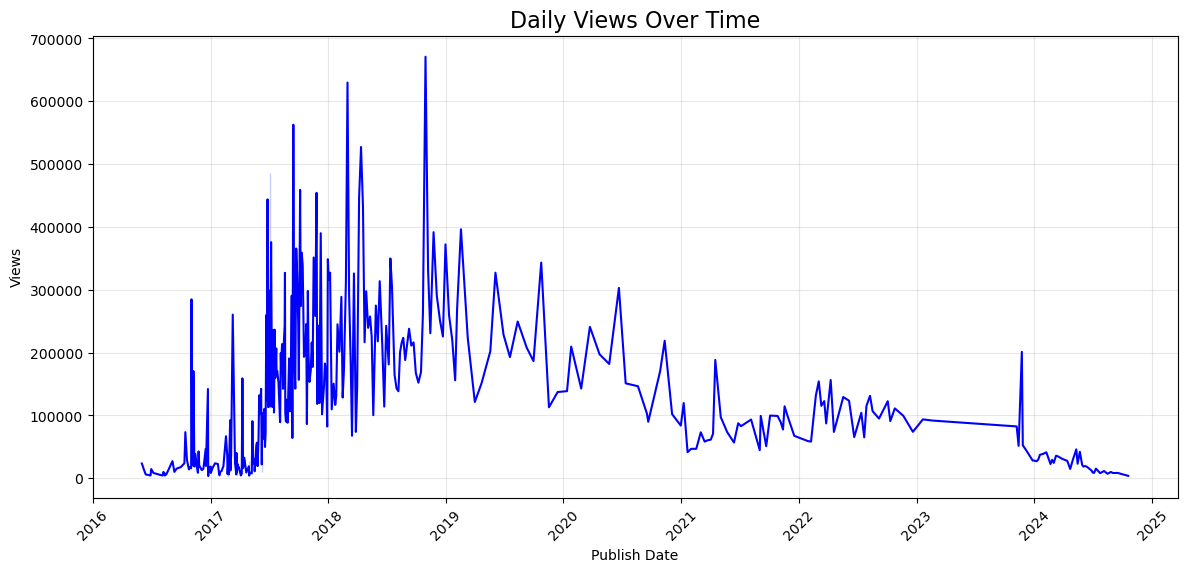

In [69]:
plt.figure(figsize=(14,6))
sns.lineplot(x='video_publish_time', y='views', data=df, color='blue')
plt.title('Daily Views Over Time', fontsize=16)
plt.xlabel('Publish Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

#### 2. Revenue vs Views

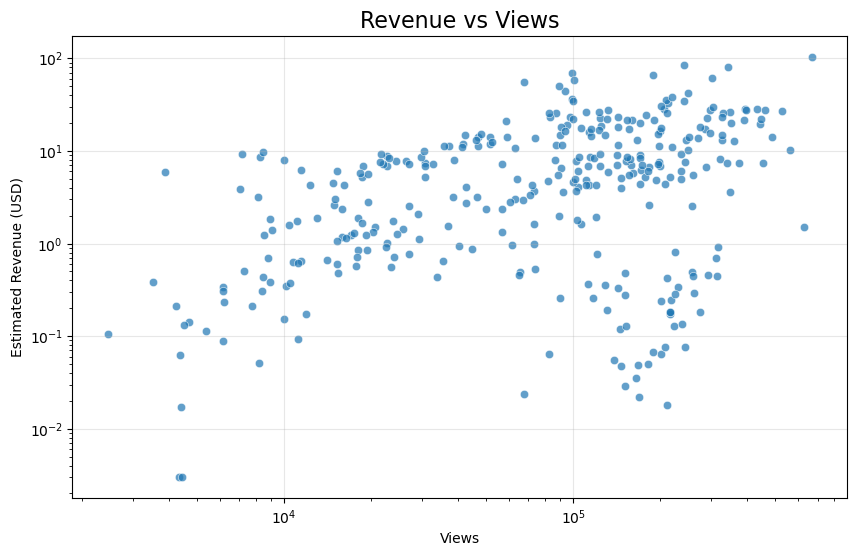

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='views', y='estimated_revenue_usd', data=df, alpha=0.7)
plt.title('Revenue vs Views', fontsize=16)
plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')
plt.xscale('log')  # helps visualize wide ranges
plt.yscale('log')
plt.grid(alpha=0.3)
plt.show()

#### 3. Engagement Rate Distribution

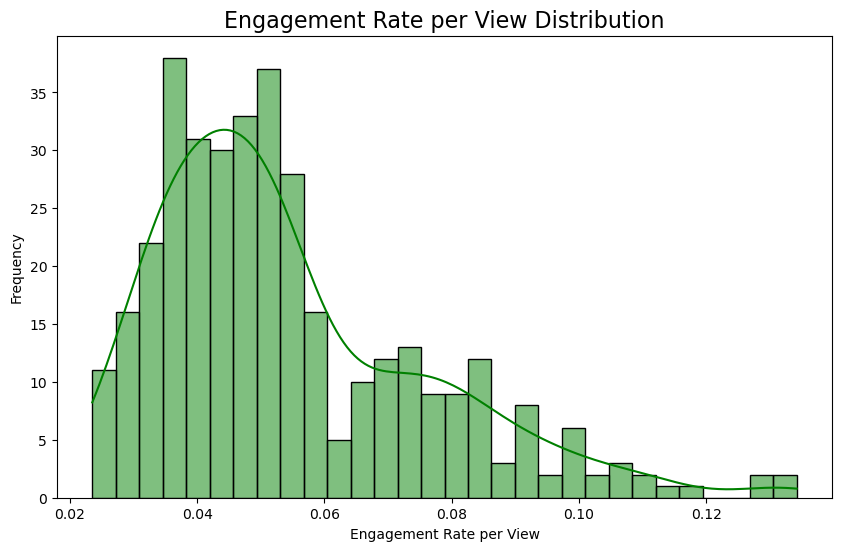

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(df['er_per_view'], bins=30, kde=True, color='green')
plt.title('Engagement Rate per View Distribution', fontsize=16)
plt.xlabel('Engagement Rate per View')
plt.ylabel('Frequency')
plt.show()

#### 4. Viewer Retention vs Views

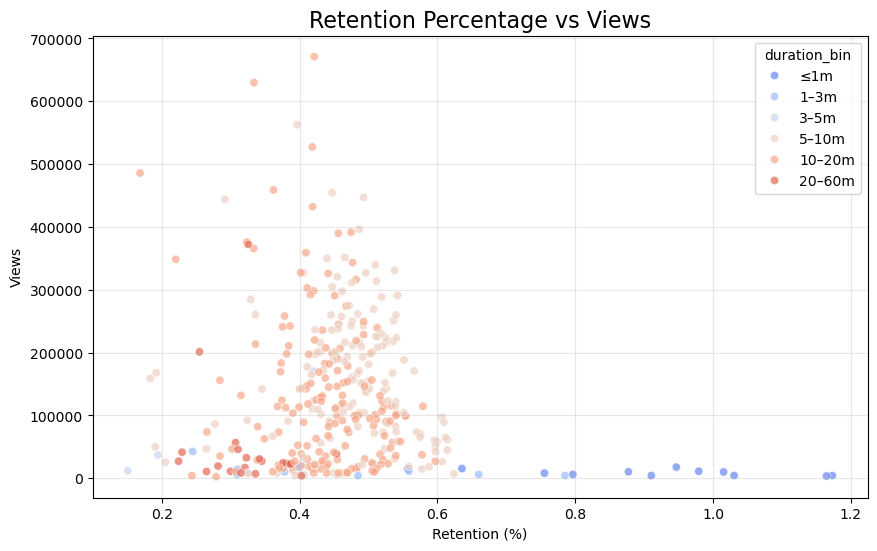

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='retention_pct', y='views', data=df, hue='duration_bin', palette='coolwarm', alpha=0.7)
plt.title('Retention Percentage vs Views', fontsize=16)
plt.xlabel('Retention (%)')
plt.ylabel('Views')
plt.grid(alpha=0.3)
plt.show()

#### 5. Average View Duration by Day of Week

C:\Users\mihir\AppData\Local\Temp\ipykernel_2636\446986309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='avg_view_duration_sec', data=df, palette='viridis')


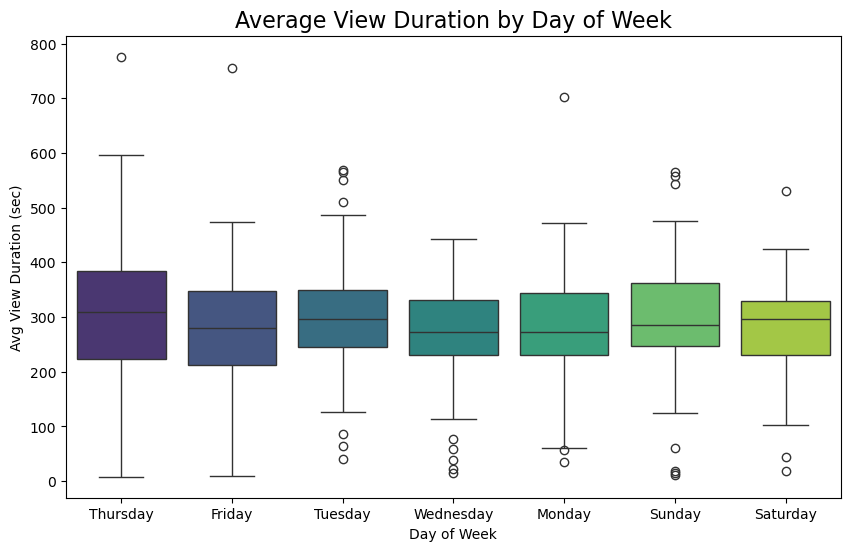

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='avg_view_duration_sec', data=df, palette='viridis')
plt.title('Average View Duration by Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Avg View Duration (sec)')
plt.show()

#### 6. Thumbnail CTR vs Views

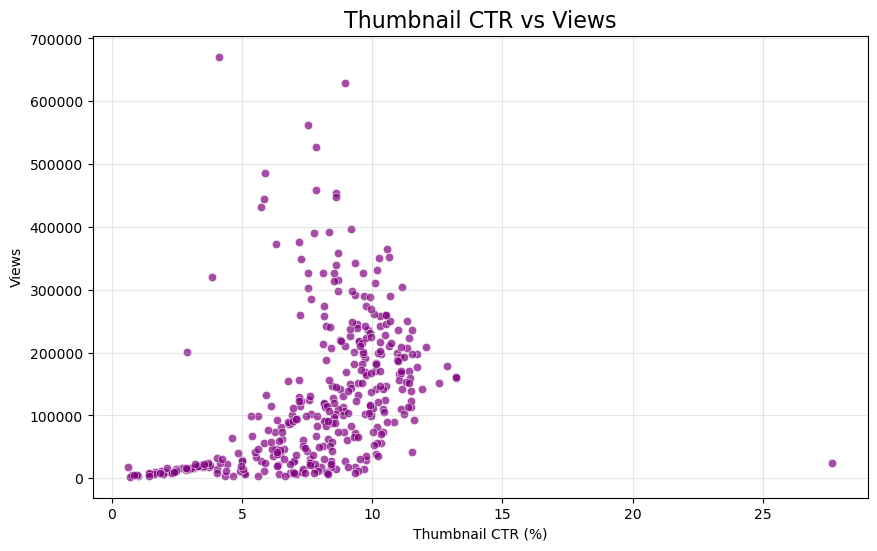

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='video_thumbnail_ctr', y='views', data=df, alpha=0.7, color='purple')
plt.title('Thumbnail CTR vs Views', fontsize=16)
plt.xlabel('Thumbnail CTR (%)')
plt.ylabel('Views')
plt.grid(alpha=0.3)
plt.show()

#### 7. RPM vs Playback CPM

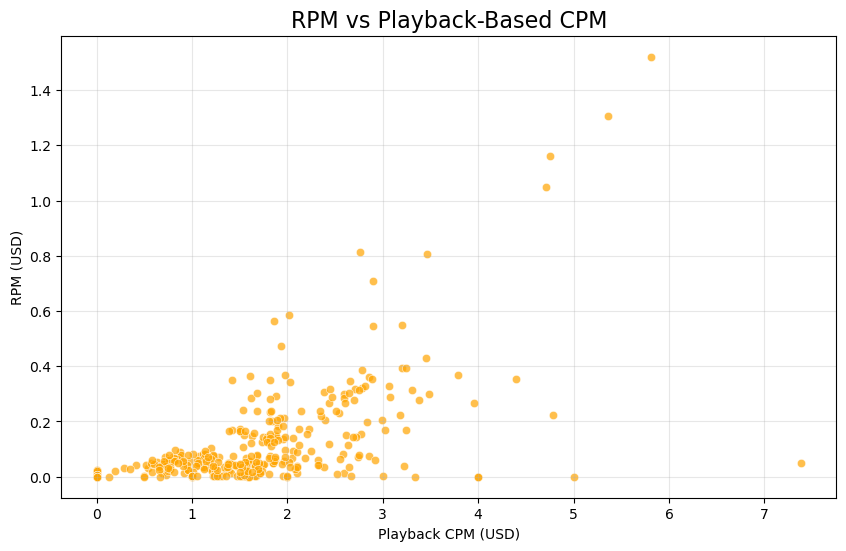

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='playback_based_cpm_usd', y='rpm_calc', data=df, alpha=0.7, color='orange')
plt.title('RPM vs Playback-Based CPM', fontsize=16)
plt.xlabel('Playback CPM (USD)')
plt.ylabel('RPM (USD)')
plt.grid(alpha=0.3)
plt.show()

#### 8. Views by Duration Bin

C:\Users\mihir\AppData\Local\Temp\ipykernel_2636\3806767981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration_bin', y='views', data=df, palette='Set2')


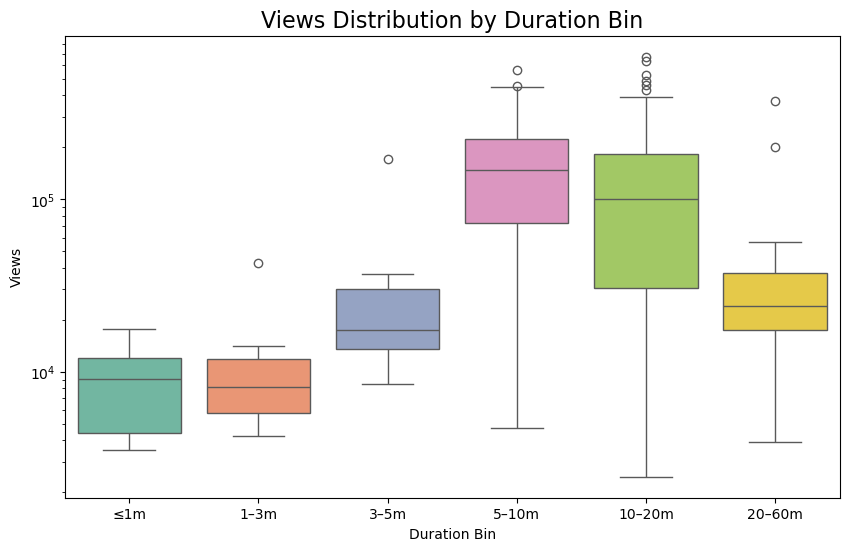

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x='duration_bin', y='views', data=df, palette='Set2')
plt.title('Views Distribution by Duration Bin', fontsize=16)
plt.xlabel('Duration Bin')
plt.ylabel('Views')
plt.yscale('log')
plt.show()

#### 9. Correlation Heatmap

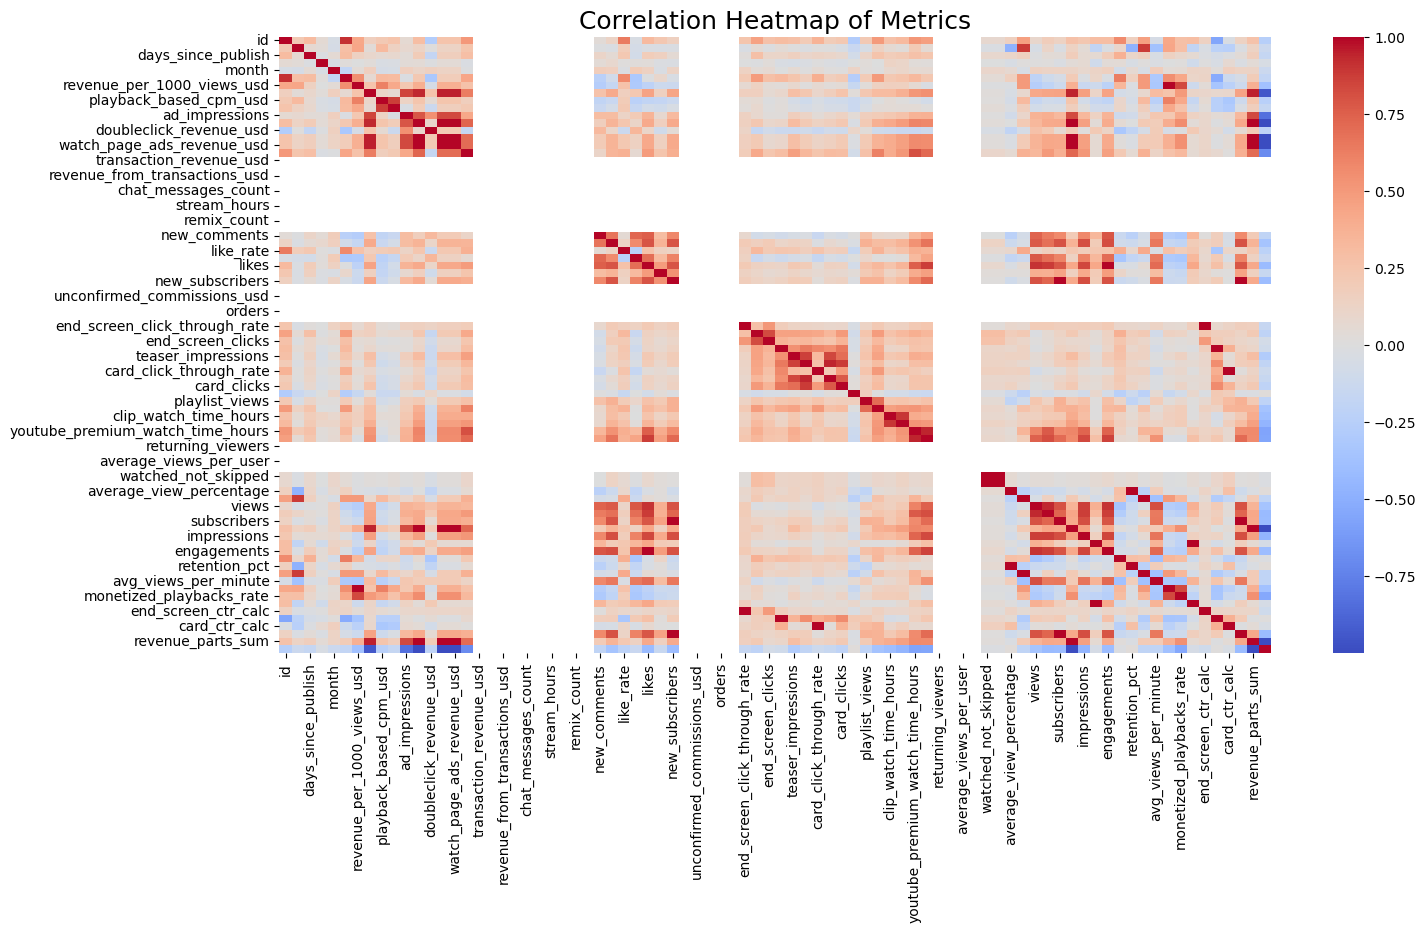

In [77]:
plt.figure(figsize=(16,8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, cbar=True)
plt.title('Correlation Heatmap of Metrics', fontsize=18)
plt.show()

## Insights

#### “Insight check” helpers (sanity + reconciliation)
- Validate rpm_calc ≈ revenue_per_1000_views_usd
- Check if monetized rate or retention correlates with RPM in your data

In [78]:
check = df[["revenue_per_1000_views_usd","rpm_calc"]].dropna()
diff_pct = np.abs(check["rpm_calc"] - check["revenue_per_1000_views_usd"]) / check["revenue_per_1000_views_usd"].replace(0,np.nan)
diff_pct.describe()


count    321.000000
mean       0.025091
std        0.072016
min        0.000015
25%        0.001074
50%        0.003526
75%        0.008585
max        0.485826
dtype: float64